In [1]:
import os
import cv2
import matplotlib.pyplot as plt

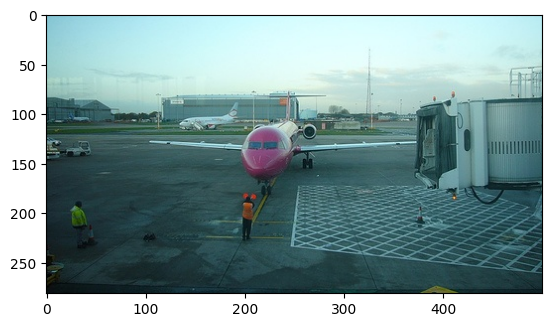

In [2]:
# 이미지 가져오기
image_path = './VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'

image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
# !pip install lxml

In [4]:
import xml.etree.ElementTree as ET

base_dir = os.path.join('VOCdevkit', 'VOC2012')
xml_path = os.path.join(base_dir,'Annotations', '2007_000032.xml')

tree = ET.parse(xml_path)
root = tree.getroot()

filename = root.find('filename').text
size = root.find('size')
width = size.find('width').text
height = size.find('height').text
depth = size.find('depth').text

print(filename,size,width,height,depth,sep=' / ')

2007_000032.jpg / <Element 'size' at 0x000001D5E3540090> / 500 / 281 / 3


In [5]:
objs = root.findall('object')

for obj in objs:
    bndbox = obj.find('bndbox')
    name = obj.find('name').text
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    print(f'{name} : ({xmin}, {ymin}), ({xmax}, {ymax})')
    

aeroplane : (104, 78), (375, 183)
aeroplane : (133, 88), (197, 123)
person : (195, 180), (213, 229)
person : (26, 189), (44, 238)


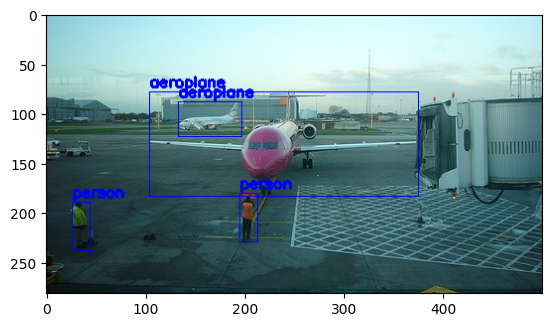

In [10]:
# 바운딩 영역 그리기 위한 이미지 카피
base_image = image.copy()

objs = root.findall('object')

for obj in objs:
    bndbox = obj.find('bndbox')
    name = obj.find('name').text
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)

    cv2.rectangle(base_image, (xmin,ymin), (xmax,ymax), color=(0,0,255), thickness=1)
    cv2.putText(base_image,name,(xmin,ymin-5),cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0,0,255), thickness=2)

plt.imshow(base_image)
plt.show()